In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler

In [178]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv('stocks_data.csv')
df.head(200)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [162]:
#####he columns Open and Close represent the starting and final price at which the stock is traded on a particular day
## High, Low and Last represent the maximum, minimum, and last price of the share for the day.
## Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.

In [163]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# new dataframe with Date(sorted) and Close as columns 
df.sort_index(ascending=True, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
new_data = df[['Date', 'Close']]


In [164]:
new_data.head()

,Date,Close
0,2013-10-08,155.80
1,2013-10-09,155.55
2,2013-10-10,160.15
3,2013-10-11,160.05
4,2013-10-14,159.45


In [165]:
new_data.loc[:, 'year'] = new_data['Date'].dt.year
new_data.loc[:, 'month'] = new_data['Date'].dt.month
new_data.loc[:, 'day'] = new_data['Date'].dt.day
new_data.loc[:, 'week'] = new_data['Date'].dt.week
new_data.loc[:, 'dayofweek'] = new_data['Date'].dt.dayofweek
new_data.loc[:, 'dayofyear'] = new_data['Date'].dt.dayofyear
new_data.loc[:, 'is_month_start'] = new_data['Date'].dt.is_month_start
new_data.loc[:, 'is_month_end'] = new_data['Date'].dt.is_month_end
new_data.loc[:, 'is_quarter_start'] = new_data['Date'].dt.is_quarter_start
new_data.loc[:, 'is_quarter_end'] = new_data['Date'].dt.is_quarter_end
new_data.loc[:, 'is_year_start'] = new_data['Date'].dt.is_year_start
new_data.loc[:, 'is_year_end'] = new_data['Date'].dt.is_year_end
cond = [new_data[['dayofweek']]==0, new_data[['dayofweek']]==4]
new_data.loc[:, 'mon_fri'] = np.select(cond, [1, 1])

/home/tammy/.virtualenvs/python36env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/tammy/.virtualenvs/python36env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [174]:
#split into train and validation
train = new_data[:987]
# train.set_index(new_data['Date'])
valid = new_data[987:]
train = train.drop('Date',1)
valid = valid.drop('Date',1)
# valid.set_index(new_data['Date'])
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [175]:
import xgboost as xgb

In [176]:
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=12, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

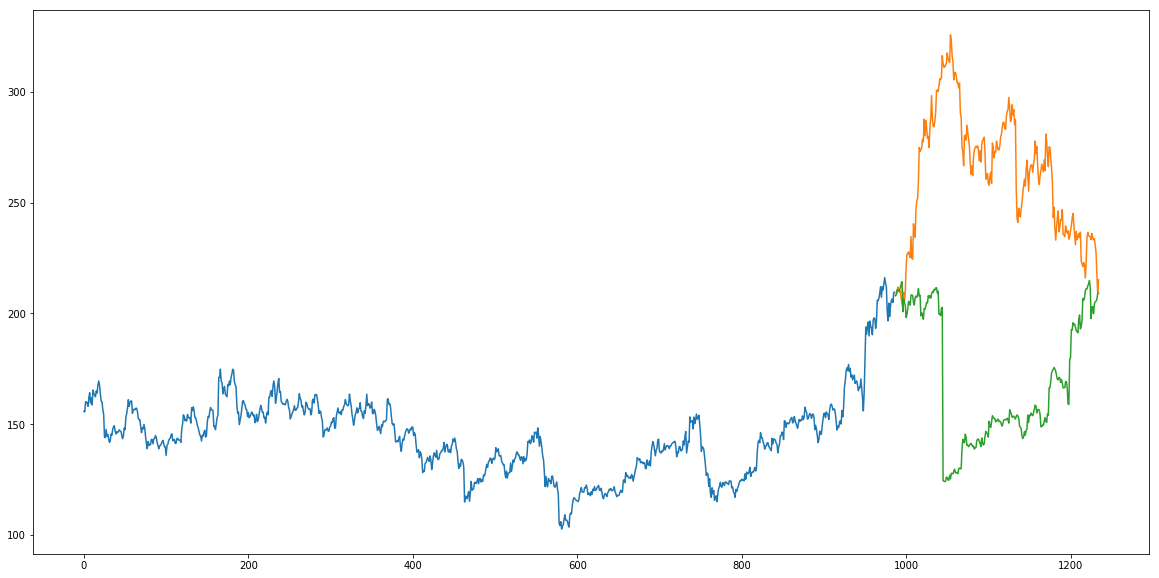

In [177]:
output = model.predict(data=x_valid)
final_df = pd.DataFrame()
final_df['Prediction'] = output
final_df.index = valid.index
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(final_df['Prediction'])